In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [4]:
!wget $data -O AB_NYC_2019.csv

--2021-09-25 19:33:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  3.10MB/s    in 2.2s    

2021-09-25 19:34:00 (3.10 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [5]:
usecols = [
    'neighbourhood_group', 
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [6]:
df = pd.read_csv('AB_NYC_2019.csv', usecols=usecols)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
price,149,225,150,89,80,200,60,79,79,150
minimum_nights,1,1,3,1,10,3,45,2,2,1
number_of_reviews,9,45,0,270,9,74,49,430,118,160
reviews_per_month,0.21,0.38,NaN,4.64,0.1,0.59,0.4,3.47,0.99,1.33
calculated_host_listings_count,6,2,1,1,1,1,1,1,1,4
availability_365,365,355,365,194,0,129,0,220,0,188


In [7]:
df.isna().any()

neighbourhood_group               False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [8]:
df.reviews_per_month.isnull().sum()

10052

In [9]:
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [10]:
print(df.shape)
df.duplicated().value_counts()

(48895, 10)


False    48895
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


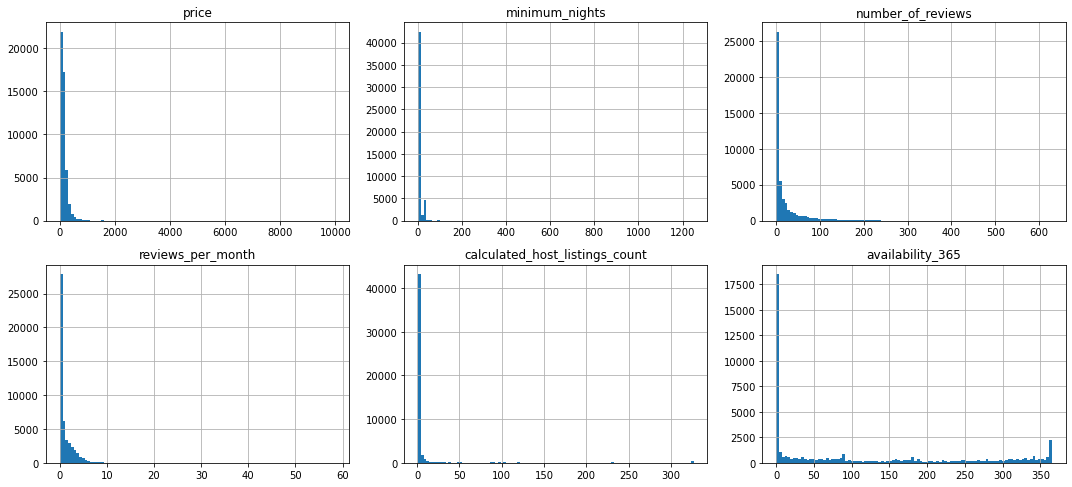

In [12]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

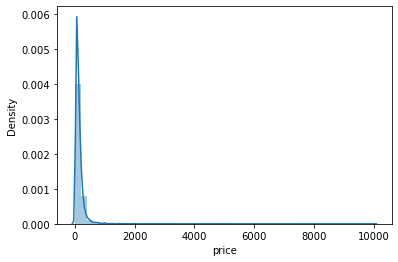

In [13]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

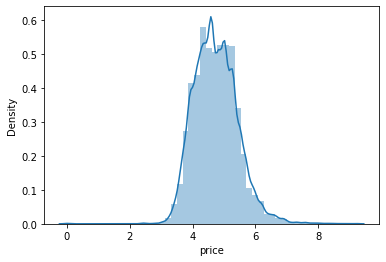

In [14]:
sns.distplot(np.log1p(df.price))

## question 1

In [15]:
df.neighbourhood_group.nunique()

5

In [16]:
df.groupby(['neighbourhood_group']).size()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

In [17]:
df.groupby(['neighbourhood_group']).size().max()

21661

## splitting the data

In [18]:
df_full_train, df_test = train_test_split(
    df, 
    test_size=0.2, 
    random_state=42
)
df_train, df_val = train_test_split(
    df_full_train, 
    test_size=0.25, 
    random_state=42
)

In [19]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

## question 2

In [22]:
numerical = [
    'latitude', 
    'longitude', 
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

<AxesSubplot:>

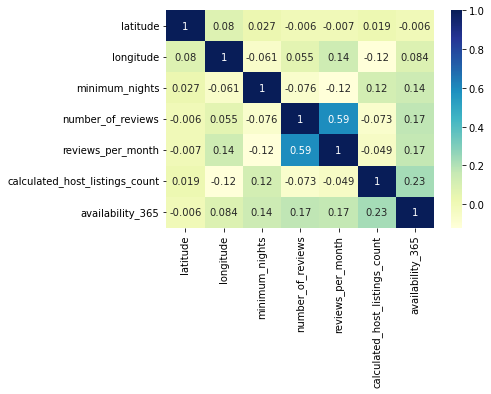

In [23]:
corr_matrix = df_train[numerical].corr().round(3)
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="YlGnBu"
           )

## make price binary

In [24]:
df.price.mean()

152.7206871868289

In [25]:
above_average = (y_train >= 152)
above_average

array([False, False, False, ...,  True, False, False])

In [26]:
y_train_binarized = (y_train >= 152).astype(int)
y_train_binarized

array([0, 0, 0, ..., 1, 0, 0])

## question 3

In [27]:
categorical = [
    'neighbourhood_group', 
    'room_type'
]

In [28]:
def mutual_info_price_score(series):
    return mutual_info_score(series, y_train_binarized)

mi = df_train[categorical].apply(mutual_info_price_score)
mi.sort_values(ascending=False).round(2)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

## one-hot encoding

In [29]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## question 4

In [30]:
baseline = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
baseline.fit(X_train, y_train_binarized)

LogisticRegression(random_state=42)

In [31]:
baseline.intercept_[0]

-0.0026402603322458933

In [32]:
baseline.coef_[0].round(3)

array([ 0.003,  0.004, -0.229, -0.096, -0.012, -0.399,  0.081,  1.247,
       -0.799, -0.132, -0.003, -0.042,  1.63 , -1.158, -0.474])

In [33]:
y_pred = baseline.predict_proba(X_val)[:, 1]
y_pred

array([0.0327736 , 0.56905287, 0.39587545, ..., 0.09974134, 0.03416823,
       0.64059179])

In [34]:
y_val_binarized = (y_val >= 152).astype(int)
y_val_binarized

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
score_baseline = accuracy_score(y_val_binarized, y_pred.astype(int)
                ).round(2)
score_baseline

0.69

In [36]:
confusion_matrix(y_val_binarized, y_pred.astype(int))

array([[6781,    0],
       [2998,    0]])

## question 5

In [37]:
predictors = numerical + categorical
print(predictors)

['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'room_type']


In [38]:
for p in predictors:
    temp = predictors.copy()
    temp.remove(p)
    
    dicts_train_drop_one = df_train[temp].to_dict(orient='records')
    dicts_val_drop_one = df_val[temp].to_dict(orient='records')
    
    dv_drop_one = DictVectorizer(sparse=False)
    dv_drop_one.fit(dicts_train_drop_one)
    
    print("Dropped preditor variable: {}".format(p))
    
    
    X_train_drop_one = dv_drop_one.transform(dicts_train_drop_one)
    X_val_drop_one = dv_drop_one.transform(dicts_val_drop_one)
    
    model_drop_one = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model_drop_one.fit(X_train_drop_one, y_train_binarized)
    print("Active predictors:")
    print(dict(zip(dv_drop_one.get_feature_names(), model_drop_one.coef_[0].round(3))))
    
    y_pred_drop_one = model_drop_one.predict_proba(X_val_drop_one)[:, 1]
    
    score_drop_one = accuracy_score(y_val_binarized, 
                                    y_pred_drop_one.astype(int)
                                    ).round(2)
    print("Accuracy score: {}".format(score_drop_one))
    
    delta = score_baseline - score_drop_one 
    print("Delta with baseline model: {}".format(delta))
    print("")

Dropped preditor variable: latitude
Active predictors:
{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'longitude': 0.031, 'minimum_nights': -0.011, 'neighbourhood_group=Bronx': -0.384, 'neighbourhood_group=Brooklyn': 0.117, 'neighbourhood_group=Manhattan': 1.188, 'neighbourhood_group=Queens': -0.802, 'neighbourhood_group=Staten Island': -0.124, 'number_of_reviews': -0.003, 'reviews_per_month': -0.036, 'room_type=Entire home/apt': 1.642, 'room_type=Private room': -1.194, 'room_type=Shared room': -0.453}
Accuracy score: 0.69
Delta with baseline model: 0.0

Dropped preditor variable: longitude
Active predictors:
{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'latitude': -0.056, 'minimum_nights': -0.011, 'neighbourhood_group=Bronx': -0.392, 'neighbourhood_group=Brooklyn': 0.114, 'neighbourhood_group=Manhattan': 1.209, 'neighbourhood_group=Queens': -0.801, 'neighbourhood_group=Staten Island': -0.128, 'number_of_reviews': -0.003, 'reviews_per_month

## question 6

In [39]:
y_train_log = np.log1p(y_train)

In [40]:
for hyperparameter in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=hyperparameter)
    model.fit(df_train[numerical], y_train_log)
    
    y_pred_log = model.predict(df_val[numerical])
    rms = mean_squared_error(y_val, np.expm1(y_pred_log), squared=False)
    
    print("Alpha value: {}".format(hyperparameter))
    print("Root mean square error: {}".format(round(rms, 3)))
    print("")

Alpha value: 0
Root mean square error: 223.417

Alpha value: 0.01
Root mean square error: 223.417

Alpha value: 0.1
Root mean square error: 223.421

Alpha value: 1
Root mean square error: 223.459

Alpha value: 10
Root mean square error: 223.809



In [41]:
# cross-checking rmse calculation by sklearn
from math import sqrt
 
model = Ridge(alpha=10)
model.fit(df_train[numerical], y_train_log)

y_pred_log = model.predict(df_val[numerical])
rms = sqrt(mean_squared_error(y_val, np.expm1(y_pred_log)))
print(round(rms, 3))

223.809
